<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

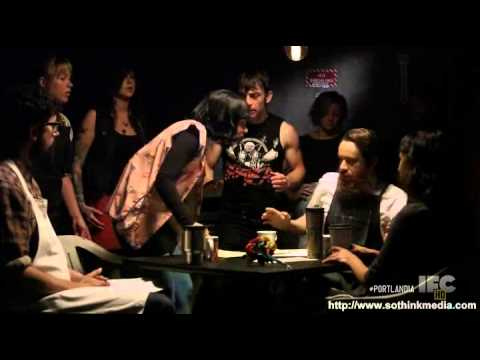

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [5]:
%pwd

'/Users/austie/PycharmProjects/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
# Start here

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
good_shops = shops[((shops['star_rating']==' 4.0 star rating ') | (shops['star_rating']==' 5.0 star rating '))]

In [9]:
bad_shops = shops[((shops['star_rating']!=' 4.0 star rating ') & (shops['star_rating']!=' 5.0 star rating '))]

In [10]:
import spacy
from spacy.tokenizer import Tokenizer
from collections import Counter

nlp = spacy.load("en_core_web_lg")

In [11]:
tokenizer = Tokenizer(nlp.vocab)

In [12]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [13]:
STOP_WORDS = nlp.Defaults.stop_words.union(['i', 'I', ' ', "i'm", "i've", 'it', "it's", 'it.', 'the', 'this', 'coffee'])

In [14]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [15]:
tokens = []
lemmas = []
stems = []

for doc in tokenizer.pipe(good_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    doc_lemmas = []
    doc_stems = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.text.lower() not in STOP_WORDS) & (token.like_num == False):
            doc_tokens.append(token.text.lower())
        if ((token.is_stop == False) and (token.is_punct == False)) & (token.text.lower() not in STOP_WORDS) and (token.like_num == False) and (token.pos_ != 'PRON'):
            doc_lemmas.append(token.lemma_)
        if ((token.is_stop == False) and (token.is_punct == False)) & (token.text.lower() not in STOP_WORDS) and (token.pos_ != 'PRON') & (token.like_num == False):
            doc_stems.append(ps.stem(token.text))

    tokens.append(doc_tokens)
    lemmas.append(doc_lemmas)
    stems.append(doc_stems)

good_shops['tokens'] = tokens
good_shops['lemmas'] = lemmas
good_shops['stems'] = stems

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [16]:
tokens = []
lemmas = []
stems = []

for doc in tokenizer.pipe(bad_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    doc_lemmas = []
    doc_stems = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.text.lower() not in STOP_WORDS) & (token.like_num == False):
            doc_tokens.append(token.text.lower())
        if ((token.is_stop == False) and (token.is_punct == False)) & (token.text.lower() not in STOP_WORDS) and (token.like_num == False) and (token.pos_ != 'PRON'):
            doc_lemmas.append(token.lemma_)
        if ((token.is_stop == False) and (token.is_punct == False)) & (token.text.lower() not in STOP_WORDS) and (token.pos_ != 'PRON') & (token.like_num == False):
            doc_stems.append(ps.stem(token.text))

    tokens.append(doc_tokens)
    lemmas.append(doc_lemmas)
    stems.append(doc_stems)

bad_shops['tokens'] = tokens
bad_shops['lemmas'] = lemmas
bad_shops['stems'] = stems

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [17]:
wc_good_tokens = count(good_shops['tokens'])
wc_good_lemmas = count(good_shops['lemmas'])
wc_good_stems = count(good_shops['stems'])
wc_bad_tokens = count(bad_shops['tokens'])
wc_bad_lemmas = count(bad_shops['lemmas'])
wc_bad_stems = count(bad_shops['stems'])

In [32]:
word_counts = [wc_good_tokens, wc_good_lemmas, wc_good_stems,
              wc_bad_tokens, wc_bad_lemmas, wc_bad_stems]

for x in word_counts:
    print(f'{x.head().sort_values(by="appears_in_pct", ascending=False)}\n')

      word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
125  place        2432   3389   1.0   0.011518       0.011518        0.396091
145  great        2174   2902   2.0   0.009863       0.021380        0.354072
332   good        1643   2180   3.0   0.007409       0.028789        0.267590
218   like        1486   2068   4.0   0.007028       0.035817        0.242020
13    love        1263   1604   5.0   0.005451       0.041269        0.205700

         word  appears_in  count  rank  pct_total  cul_pct_total  \
120     place        2598   3749   1.0   0.012741       0.012741   
35   check-in        2521   2530   2.0   0.008598       0.021340   
142     great        1625   2041   4.0   0.006936       0.035732   
214      like        1555   2194   3.0   0.007456       0.028796   
331      good        1533   1974   5.0   0.006709       0.042441   

     appears_in_pct  
120        0.423127  
35         0.410586  
142        0.264658  
214        0.253257  
331        0

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [33]:
import squarify
import matplotlib.pyplot as plt

In [36]:
wc_top20good = wc_good_tokens[wc_good_tokens['rank'] <= 20]
wc_top20bad = wc_bad_tokens[wc_bad_tokens['rank'] <= 20]
wcdiff = wc_top20good.set_index('word').join(wc_top20bad.set_index('word'), on='word', how='inner', lsuffix='_good', rsuffix='_bad')
wcdiff['diff'] = wcdiff['appears_in_pct_good'] - wcdiff['appears_in_pct_bad']
wcdiff['abs_diff'] = abs(wcdiff['appears_in_pct_good'] - wcdiff['appears_in_pct_bad'])
wcdiff['abs_diff'].sort_values(ascending=False)[:10]

word
great       0.175210
like        0.129254
don't       0.101199
pretty      0.060008
food        0.045689
time        0.042868
got         0.039559
good        0.031191
little      0.029730
check-in    0.017036
Name: abs_diff, dtype: float64

In [39]:
wc_top20good_lemmas = wc_good_lemmas[wc_good_lemmas['rank'] <= 20]
wc_top20bad_lemmas = wc_bad_lemmas[wc_bad_lemmas['rank'] <= 20]
wcdiff_lemmas = wc_top20good_lemmas.set_index('word').join(wc_top20bad_lemmas.set_index('word'), on='word', how='inner', lsuffix='_good', rsuffix='_bad')
wcdiff_lemmas['diff'] = wcdiff_lemmas['appears_in_pct_good'] - wcdiff_lemmas['appears_in_pct_bad']
wcdiff_lemmas['abs_diff'] = abs(wcdiff_lemmas['appears_in_pct_good'] - wcdiff_lemmas['appears_in_pct_bad'])
wcdiff_lemmas['abs_diff'].sort_values(ascending=False)[:10]

word
like        0.126146
order       0.111987
check-in    0.100288
come        0.068475
time        0.049597
food        0.045865
get         0.044086
drink       0.032458
good        0.031491
try         0.020398
Name: abs_diff, dtype: float64

In [40]:
wc_top20good_stems = wc_good_stems[wc_good_stems['rank'] <= 20]
wc_top20bad_stems = wc_bad_stems[wc_bad_stems['rank'] <= 20]
wcdiff_stems = wc_top20good_stems.set_index('word').join(wc_top20bad_stems.set_index('word'), on='word', how='inner', lsuffix='_good', rsuffix='_bad')
wcdiff_stems['diff'] = wcdiff_stems['appears_in_pct_good'] - wcdiff_stems['appears_in_pct_bad']
wcdiff_stems['abs_diff'] = abs(wcdiff_stems['appears_in_pct_good'] - wcdiff_stems['appears_in_pct_bad'])
wcdiff_stems['abs_diff'].sort_values(ascending=False)[:10]

word
great       0.174858
like        0.135293
order       0.120703
check-in    0.100288
time        0.052685
food        0.045630
drink       0.038418
come        0.035440
good        0.024989
work        0.016764
Name: abs_diff, dtype: float64

### Words with greatest absolute difference between good and bad coffee shops


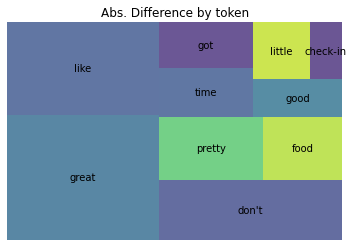

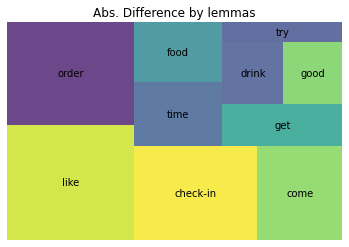

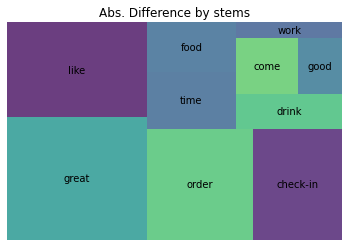

In [41]:
squarify.plot(sizes=wcdiff['abs_diff'].sort_values(ascending=False)[:10], label=wcdiff['abs_diff'].sort_values(ascending=False).index[:10], alpha=.8)
plt.axis('off')
plt.title('Abs. Difference by token')
plt.show()
squarify.plot(sizes=wcdiff_lemmas['abs_diff'].sort_values(ascending=False)[:10], label=wcdiff_lemmas['abs_diff'].sort_values(ascending=False).index[:10], alpha=.8)
plt.axis('off')
plt.title('Abs. Difference by lemmas')
plt.show()
squarify.plot(sizes=wcdiff_stems['abs_diff'].sort_values(ascending=False)[:10], label=wcdiff_stems['abs_diff'].sort_values(ascending=False).index[:10], alpha=.8)
plt.axis('off')
plt.title('Abs. Difference by stems')
plt.show()

### Words with greatest true difference and absolute difference

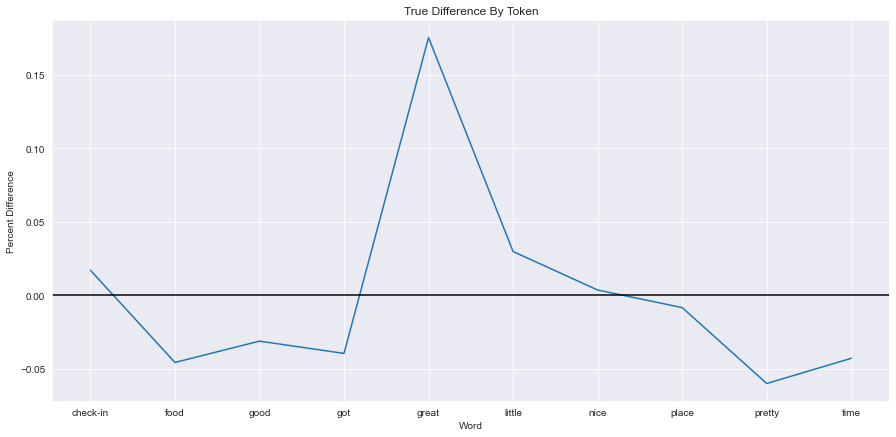

In [43]:
import seaborn as sns
fig, ax = plt.subplots()
sns.lineplot(x=wcdiff['diff'].sort_values(ascending=False).index[:10], y=wcdiff['diff'].sort_values(ascending=False)[:10])
sns.set_style('darkgrid')
fig.set_size_inches(15,7)
plt.xlabel('Word')
plt.ylabel('Percent Difference')
plt.title('True Difference By Token')
ax.axhline(0, ls='-', color='black')

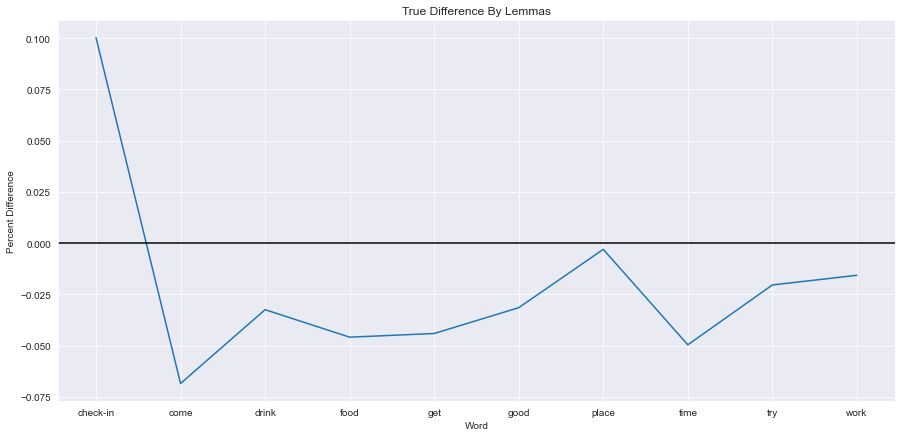

In [45]:
fig, ax = plt.subplots()
sns.lineplot(x=wcdiff_lemmas['diff'].sort_values(ascending=False).index[:10], y=wcdiff_lemmas['diff'].sort_values(ascending=False)[:10])
sns.set_style('darkgrid')
fig.set_size_inches(15,7)
plt.xlabel('Word')
plt.ylabel('Percent Difference')
plt.title('True Difference By Lemmas')
ax.axhline(0, ls='-', color='black')

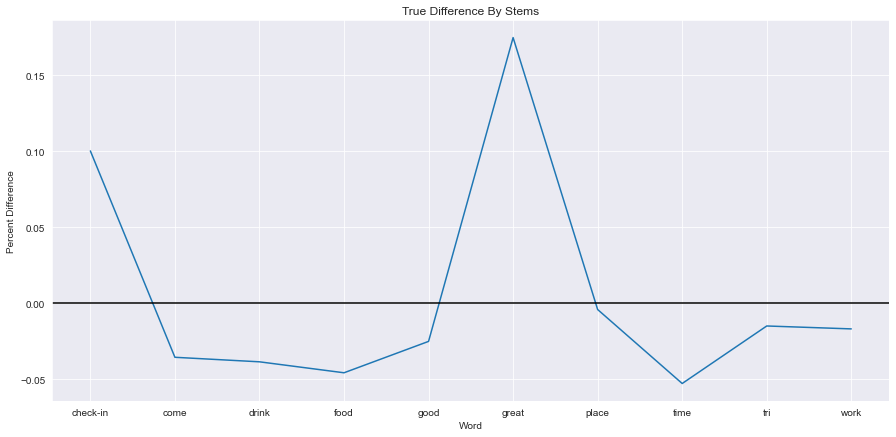

In [46]:
fig, ax = plt.subplots()
sns.lineplot(x=wcdiff_stems['diff'].sort_values(ascending=False).index[:10], y=wcdiff_stems['diff'].sort_values(ascending=False)[:10])
sns.set_style('darkgrid')
fig.set_size_inches(15,7)
plt.xlabel('Word')
plt.ylabel('Percent Difference')
plt.title('True Difference By Stems')
ax.axhline(0, ls='-', color='black')

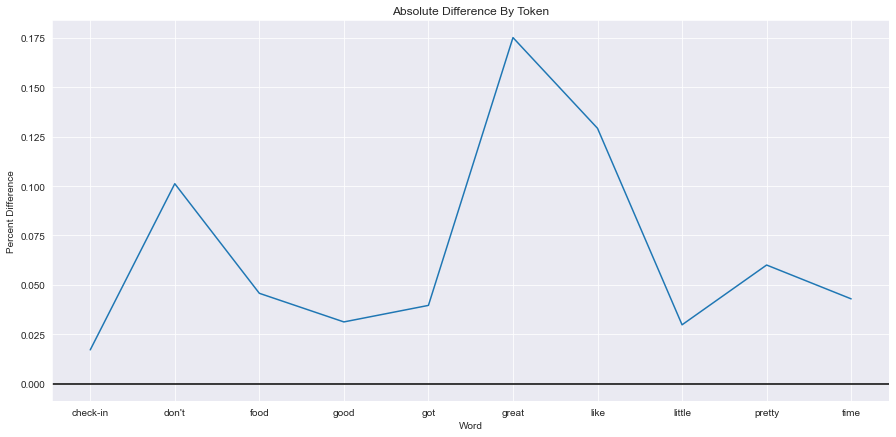

In [47]:
fig, ax = plt.subplots()
sns.lineplot(x=wcdiff['abs_diff'].sort_values(ascending=False).index[:10], y=wcdiff['abs_diff'].sort_values(ascending=False)[:10])
sns.set_style('darkgrid')
fig.set_size_inches(15,7)
plt.xlabel('Word')
plt.ylabel('Percent Difference')
plt.title('Absolute Difference By Token')
ax.axhline(0, ls='-', color='black')

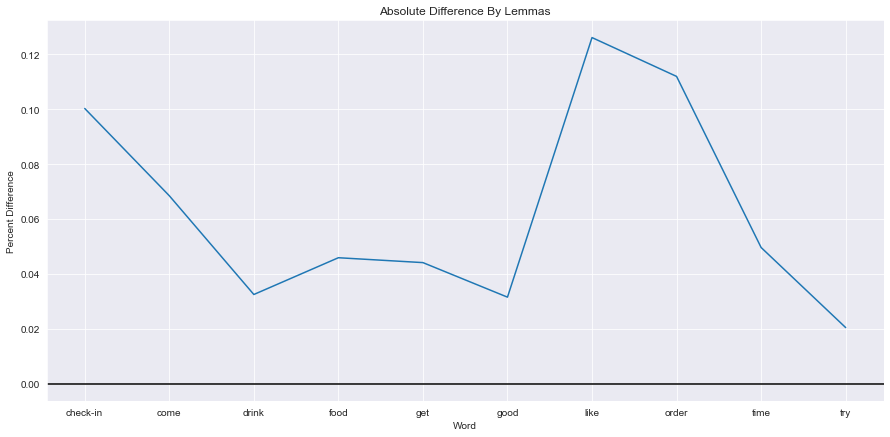

In [48]:
fig, ax = plt.subplots()
sns.lineplot(x=wcdiff_lemmas['abs_diff'].sort_values(ascending=False).index[:10], y=wcdiff_lemmas['abs_diff'].sort_values(ascending=False)[:10])
sns.set_style('darkgrid')
fig.set_size_inches(15,7)
plt.xlabel('Word')
plt.ylabel('Percent Difference')
plt.title('Absolute Difference By Lemmas')
ax.axhline(0, ls='-', color='black')

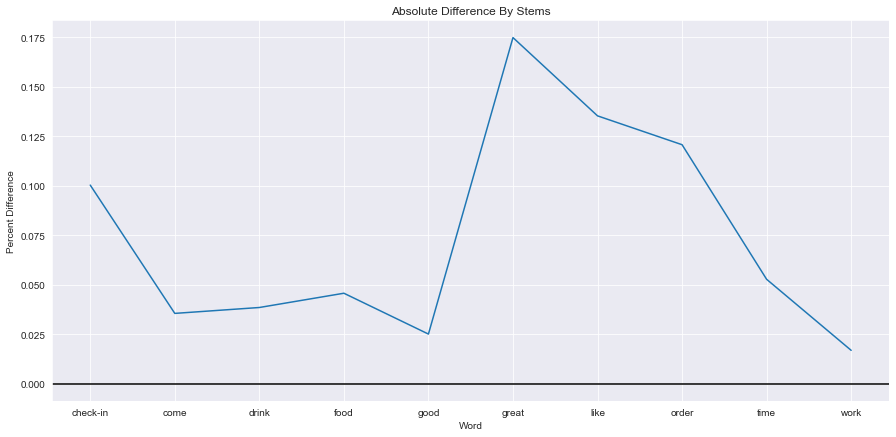

In [49]:
fig, ax = plt.subplots()
sns.lineplot(x=wcdiff_stems['abs_diff'].sort_values(ascending=False).index[:10], y=wcdiff_stems['abs_diff'].sort_values(ascending=False)[:10])
sns.set_style('darkgrid')
fig.set_size_inches(15,7)
plt.xlabel('Word')
plt.ylabel('Percent Difference')
plt.title('Absolute Difference By Stems')
ax.axhline(0, ls='-', color='black')

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

